# Assignment Questions:- **Foundations of Machine Learning and EDA**

<div align="right">(by  Ritesh)</div>

# Q1. What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.

## Artificial Intelligence (AI)
- **Scope:** Broadest field that aims to build intelligent systems capable of thinking and acting like humans.
- **Techniques Used:** Rule-based systems, robotics, expert systems, optimization, ML, DL, NLP (Natural Language Processing).
- **Applications:** Chatbots, self-driving cars, recommendation systems, smart assistants (Alexa, Siri).

 **AI = The umbrella field focused on intelligent behavior.**

---

## Machine Learning (ML)
- **Scope:** Subset of AI that enables machines to learn patterns from data without explicit programming.
- **Techniques Used:** Regression, decision trees, clustering, SVM, random forest.
- **Applications:** Spam detection, price prediction, fraud detection, medical diagnosis.

 **ML = AI that learns from data.**

---

## Deep Learning (DL)
- **Scope:** Subset of ML that uses **Artificial Neural Networks** to mimic the human brain.
- **Techniques Used:** CNN, RNN, LSTM, GAN, Transformers.
- **Applications:** Face recognition, speech recognition, autonomous driving, image classification.

 **DL = ML with neural networks and large data + powerful computing.**

---

## Data Science
- **Scope:** Field focused on extracting meaningful insights from data for decision-making.
- **Techniques Used:** Statistics, ML, data visualization, data preprocessing, Big Data tools.
- **Applications:** Business analytics, customer segmentation, revenue forecasting, dashboards.

 **Data Science = Insights + analytics + storytelling with data.**

---

##  Key Comparison Table

| Feature | AI | ML | DL | Data Science |
|--------|----|----|----|--------------|
| Focus | Create smart systems | Learn from data | Neural network-based learning | Analyze data for insights |
| Data Requirement | Medium | High | Very High | Varies |
| Techniques | Rules + ML + DL | Algorithms on data | Deep Neural Networks | Stats + ML + Data tools |
| Output | Decisions & actions | Predictions | Complex pattern recognition | Business insights |
| Dependency | Independent field | Subset of AI | Subset of ML | Uses ML/DL but is separate |

---

## Summary
- **AI** is the **broad goal** (intelligent behavior).
- **ML** is the **approach** (learning from data).
- **DL** is the **advanced ML technique** (neural networks).
- **Data Science** is about **insights and decision-making** using data.

---


# Q2. Explain overfitting and underfitting in ML. How can you detect and prevent them?


## **Overfitting**
- **Definition:** Model learns the training data *too well*, including noise and outliers.
- **Behavior:** High accuracy on training data but poor accuracy on testing/new data.
- **Reason:** Model is **too complex**.

 The model memorizes instead of generalizing.

---

## **Underfitting**
- **Definition:** Model is too simple and fails to learn important patterns in the data.
- **Behavior:** Low accuracy on both training and testing data.
- **Reason:** Model is **not complex enough**.

 The model can’t capture real patterns.

---

##  **Graphical Understanding**

| Type of Error | Training Error | Testing Error |
|--------------|---------------|---------------|
| Underfitting | High | High |
| Good Fit | Low | Low |
| Overfitting | Very Low | High |

---

##  **Bias-Variance Tradeoff**

| Model State | Bias | Variance |
|------------|------|----------|
| Underfitting | High | Low |
| Good Fit | Balanced | Balanced |
| Overfitting | Low | High |

 Goal: Find the right balance between **bias and variance**.

---

##  How to Detect Overfitting & Underfitting
- Compare **training vs testing accuracy**
- Use **learning curves**
- Cross-validation (e.g., **k-fold CV**)
- Track **loss difference** between datasets

---

# **Prevention Techniques**

## Preventing Overfitting
- Use **Regularization** (L1, L2, Dropout for DL)
- **Cross-validation**
- **Early stopping**
- Reduce model complexity
- More training data / Data augmentation

---

## Preventing Underfitting
- Increase model complexity
- Reduce regularization strength
- Train longer / Improve feature engineering

---

##  Summary
- **Overfitting** = learns noise → poor on new data  
- **Underfitting** = learns too little → poor everywhere  
- Controlled through **bias-variance balance**, **cross-validation**, and **regularization**

---


#Q3. How would you handle missing values in a dataset? Explain at least three methods with examples.

Missing values can negatively affect model performance and lead to incorrect insights.  
So, we use different techniques to handle them based on the situation.

---

## 1.  Deletion Method (Removing Data)

### a) **Row Deletion**
Remove rows containing missing values if they are few and random.

**Example:**  
If a dataset has 1% null rows → delete them safely.

```python
df.dropna(inplace=True)
```
### b) **Column Deletion**
Remove columns with very high missing percentage (e.g., > 60%).

**Example :**

Good when missing data is minimal.

 Not suitable when valuable data is lost.

```python
df.dropna(axis=1, inplace=True)
```

## 2. Imputation: Fill Missing Values with Statistics

### a) **Mean Imputation (for numerical data)**

```python
df['Age'].fillna(df['Age'].mean(), inplace=True)
```

### b) **Median Imputation (robust for skewed data)**
```pyhton
df['Salary'].fillna(df['Salary'].median(), inplace=True)
```
### c) **Mode Imputation (for categorical data)**
```python
df['City'].fillna(df['City'].mode()[0], inplace=True)
```
### **Note**

- Simple and fast
- Reduces data variance (may cause bias)

## 3 Predictive Modeling Imputation

Use ML models to predict missing values using other features.

**Example**:

- Predict missing Age using Regression

- Predict missing City using Classification (Decision Tree)
```python
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_imputed = imputer.fit_transform(df)
```
- More accurate → preserves data pattern
- More complex and time-consuming

##  Summary Table:

| Method | Suitable For | Pros | Cons |
|--------|--------------|------|------|
| Deletion | When missing percentage is very low (≤ 5%) | Simple, quick | Loss of data and information |
| Mean/Median/Mode Imputation | Numerical & Categorical features | Easy to apply and understand | Reduces variance ➝ may introduce bias |
| Predictive Modeling Imputation | Important features with high missing data | More accurate ➝ preserves data patterns | Time-consuming and more complex |


## Q4. What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).


## What is an Imbalanced Dataset?
An imbalanced dataset is when **one class has significantly more samples than another**, causing the model to be biased toward the majority class.

**Example**
- Fraud Detection  
  - 98% Non-Fraud
  - 2% Fraud  
The model might predict everything as “Non-Fraud” and still show 98% accuracy — but it's useless.

 Accuracy becomes misleading. We must balance the classes.

---

##  **Techniques to Handle Imbalanced Data**

---

### 1. Random Oversampling & Undersampling

####  Random Oversampling
- Duplicates samples from the **minority** class
- Helps models learn rare cases better

```python
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
```
- **Pros:** Simple, improves representation
- **Cons:** Overfitting risk (due to duplication)

### Random Undersampling
- Removes samples from the majority class
```python
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
```
- **Pros:** Fast and reduces training size
- **Cons:** Loss of useful data (information removed)

### 2️. **SMOTE** (Synthetic Minority Oversampling Technique)

- Creates synthetic samples for minority class

- Better than simple duplication
```python
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
```
- **Pros:** Adds realistic new data → less overfitting
- **Cons:** Can create noise if dataset is highly overlapping

##  Summary Table: Techniques to Handle Imbalanced Data

| Method | Type | When to Use | Pros | Cons |
|--------|------|-------------|------|------|
| Random Oversampling | Data-Level | Small imbalance | Easy to apply, improves recall | Risk of overfitting due to duplicate samples |
| Random Undersampling | Data-Level | Majority class is very large | Faster training, reduces size | Loss of important information |
| SMOTE | Data-Level | Moderate imbalance | Creates synthetic samples, reduces overfitting | Can introduce noisy samples |
| Class Weights | Algorithm-Level | When using ML models directly | No data modification needed | Requires hyperparameter tuning |


# Q5. Why is feature scaling important in ML? Compare Min-Max scaling and Standardization.
Feature scaling ensures that **all features contribute equally** during model training.

If features have different units/scales:
- Distance-based models (KNN, SVM) get biased toward larger values
- Gradient Descent becomes slow because weights adjust unevenly
- Neural Networks may fail to converge properly

Example:
- Height: 170 cm → small scale
- Salary: ₹50,000 → large scale  
Salary will dominate learning if not scaled.

 Scaling improves model performance, convergence speed & accuracy.

---

##  →   Types of Feature Scaling

### 1️. Min-Max Scaling (Normalization)
- Transforms values in **range [0, 1]**
- Formula:  
  \[
  X' = \frac{X - X_{min}}{X_{max} - X_{min}}
  \]

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
```
**Note**

Best for: Neural Networks, KNN, SVM

Sensitive to outliers

###2. Standardization (Z-score Scaling)

- Converts data to mean = 0 and standard deviation = 1

- Standardization transforms the feature so that it has:

- Mean = 0  
- Standard Deviation = 1  

\[
X' = \frac{X - \mu}{\sigma}
\]

Where:  
- \( X \) = Original value  
- \( \mu \) = Mean of the feature  
- \( \sigma \) = Standard deviation of the feature  
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
```
##  Comparison: Min-Max Scaling vs Standardization

| Feature | Min-Max Scaling | Standardization |
|--------|----------------|----------------|
| Output Range | 0 to 1 (or custom range) | No fixed range (mean=0, std=1) |
| Sensitivity to Outliers | Highly sensitive | Less sensitive |
| Works Best For | KNN, SVM, Neural Networks | Linear/Logistic Regression, PCA, SVM |
| When to Use | Data already within a known range | Data follows normal distribution |
| Preserves Shape of Distribution | Yes | Yes (but rescales spread) |





# Q6. Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?


## → What is Label Encoding?
- Converts **categorical text values → numeric labels**
- Each category is assigned an integer value  
  Example:  
  Red → 0, Blue → 1, Green → 2  

```python
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Color'] = le.fit_transform(df['Color'])
```
### **Example of Ordinal Categories**
Low < Medium < High
(Here Label Encoding is suitable)

## → What is One-Hot Encoding?

- Converts categories into binary columns (0/1)

- No ordering assumption
**Example**
Color → [Red, Blue, Green]
becomes:

- Red = [1,0,0]

- Blue = [0,1,0]

- Green = [0,0,1]
```python
import pandas as pd
df = pd.get_dummies(df, columns=['Color'])
```
## Comparison: Label Encoding vs One-Hot Encoding

| Feature | Label Encoding | One-Hot Encoding |
|--------|----------------|-----------------|
| Category Type | Ordinal (ordered categories) | Nominal (no order) |
| Output | Single numeric column | Multiple binary columns |
| Implies Order? | Yes | No |
| Model Compatibility | Works well with Tree-based models | Works well with Linear & Distance-based models |
| Risk | Creates false numeric ranking | High dimensionality when many categories |


# Q7. Google Play Store Dataset
##a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?

Saving googleplaystore.csv to googleplaystore.csv
Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL 

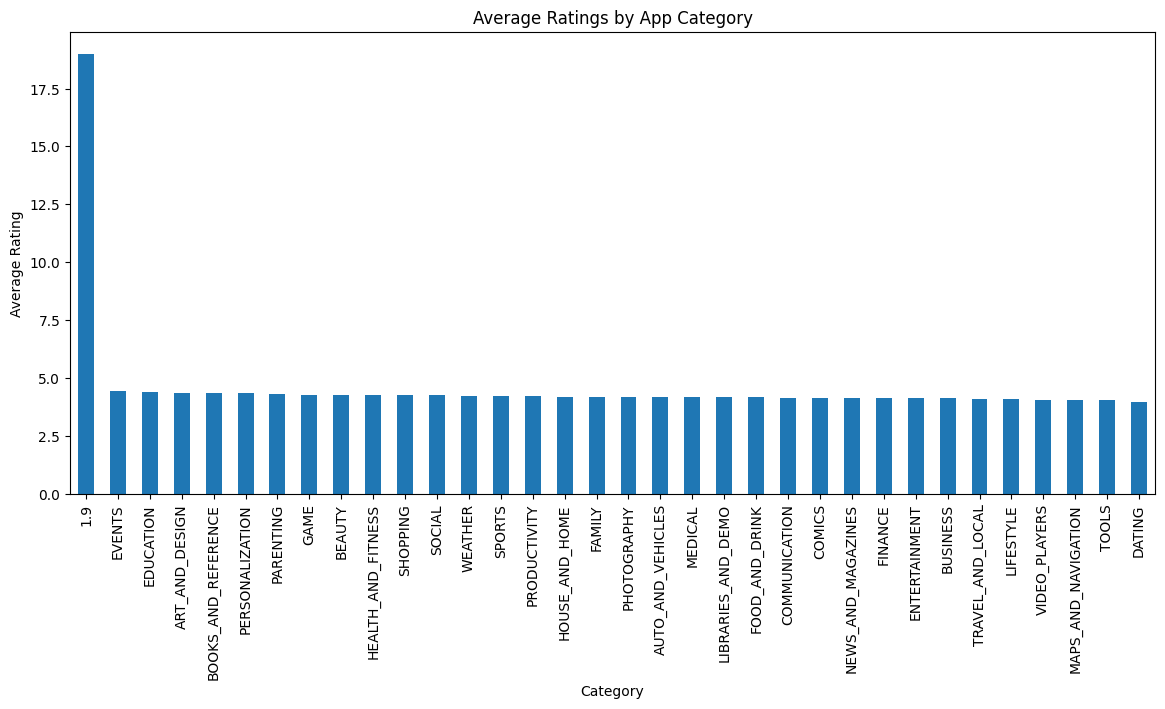

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload CSV from your system
uploaded = files.upload()

# Replace the filename if different
df = pd.read_csv('googleplaystore.csv')

# Remove missing ratings
df_clean = df.dropna(subset=['Rating'])

# Compute average ratings per category
category_ratings = df_clean.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(category_ratings)

# Visualization
plt.figure(figsize=(14,6))
category_ratings.plot(kind='bar')
plt.title("Average Ratings by App Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()


# Q8. Titanic Dataset
##a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?
## b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?


Saving titanic.csv to titanic.csv
Survival Rate by Passenger Class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


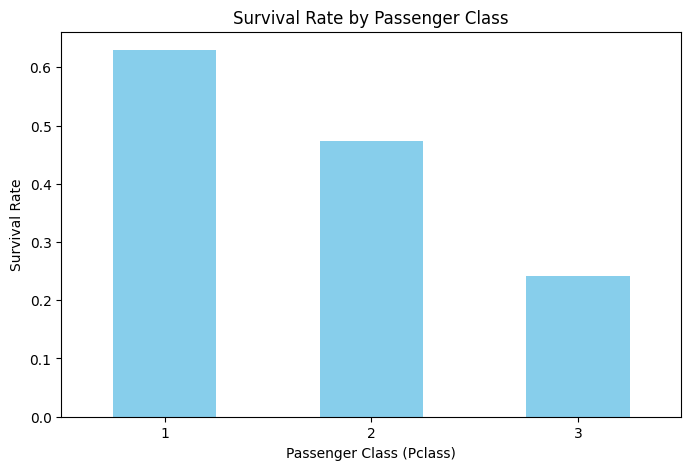


Survival Rate by Age Group:
 Age_Group
Adult    0.361183
Child    0.539823
Name: Survived, dtype: float64


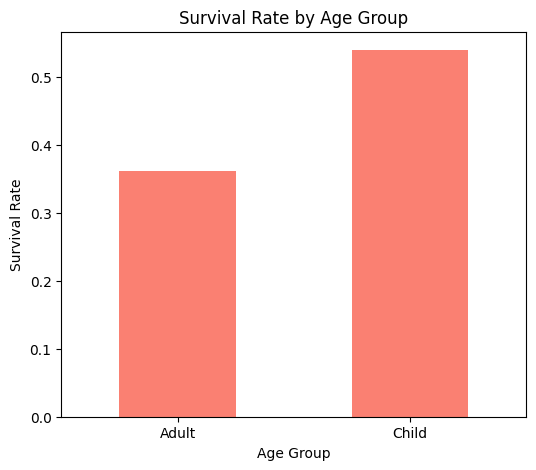

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload Titanic CSV from your system
uploaded = files.upload()

# Replace the filename if different
titanic = pd.read_csv('titanic.csv')

# -------------------------------
# Part a) Survival Rate by Passenger Class (Pclass)
# -------------------------------
pclass_survival = titanic.groupby('Pclass')['Survived'].mean().sort_index()
print("Survival Rate by Passenger Class:\n", pclass_survival)

# Visualization
plt.figure(figsize=(8,5))
pclass_survival.plot(kind='bar', color='skyblue')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

# -------------------------------
# Part b) Survival Rate by Age Group
# -------------------------------
# Create Age group column
titanic['Age_Group'] = titanic['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Calculate survival rate by age group
age_survival = titanic.groupby('Age_Group')['Survived'].mean()
print("\nSurvival Rate by Age Group:\n", age_survival)

# Visualization
plt.figure(figsize=(6,5))
age_survival.plot(kind='bar', color='salmon')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()


#Q9. Flight Price Prediction Dataset
###a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.
###b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why?


Saving flight_price.csv to flight_price (5).csv
Columns available in CSV:
 Index(['Unnamed:_0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

Average Flight Price by Days Left:
 days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.6

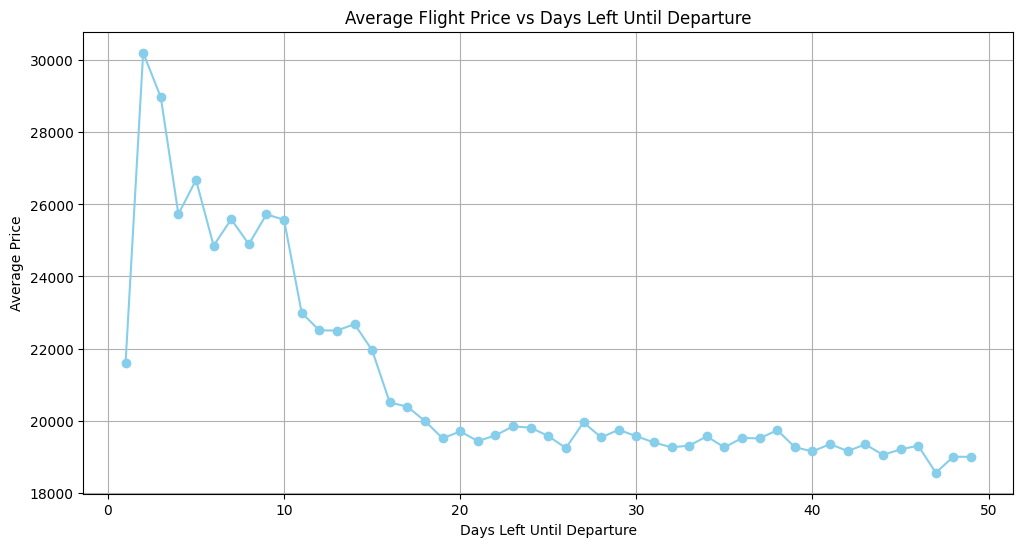


Exponential price surge observed at these days before departure:
 days_left
2     30211.299801
5     26679.773368
7     25588.367351
9     25726.246072
10    25572.819134
13    22498.885384
14    22678.002363
17    20386.353949
20    19699.983390
22    19590.667385
23    19840.913451
24    19803.908896
27    19950.866195
29    19744.653119
32    19258.135308
33    19306.271739
34    19562.008266
36    19517.688444
37    19506.306516
38    19734.912316
40    19144.972439
41    19347.440460
43    19340.528894
45    19199.876307
46    19305.351623
48    18998.126851
49    18992.971888
Name: price, dtype: float64

Recommendation: Book flights before surge (e.g., 2-4 weeks prior).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# -------------------------------
# Step 1: Upload CSV
# -------------------------------
uploaded = files.upload()
filename = list(uploaded.keys())[0]
flights = pd.read_csv(filename)

# -------------------------------
# Step 2: Clean column names
# -------------------------------
flights.columns = flights.columns.str.strip()
flights.columns = [col.replace(' ', '_') for col in flights.columns]
print("Columns available in CSV:\n", flights.columns)

# -------------------------------
# Step 3: Part a) Flight Prices vs Days Left
# -------------------------------
# Identify columns
days_col = None
price_col = None
for col in flights.columns:
    if 'day' in col.lower():
        days_col = col
    if 'price' in col.lower():
        price_col = col

# Average price vs days left
days_price = flights.groupby(days_col)[price_col].mean().sort_index()
print("\nAverage Flight Price by Days Left:\n", days_price)

# Plot
plt.figure(figsize=(12,6))
days_price.plot(marker='o', color='skyblue')
plt.title("Average Flight Price vs Days Left Until Departure")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

# Exponential surge detection
surge_threshold = days_price.diff().mean() * 3
surge_days = days_price[days_price.diff() > surge_threshold]
if not surge_days.empty:
    print("\nExponential price surge observed at these days before departure:\n", surge_days)

print("\nRecommendation: Book flights before surge (e.g., 2-4 weeks prior).")

# -------------------------------
# Step 4: Part b) Price Comparison Across Airlines for a Specific Route
# -------------------------------
# Ask user to input the correct column names for airline and route
airline_col = input("Enter the column name for Airline (check available columns above): ")
route_col = input("Enter the column name for Route/From-To (check available columns above): ")
route_name = input("Enter the route you want to analyze (e.g., Delhi-Mumbai): ")

# Filter for the route
route = flights[flights[route_col] == route_name]

# Calculate average price per airline
airline_prices = route.groupby(airline_col)[price_col].mean().sort_values()
print(f"\nAverage Price by Airline ({route_name}):\n", airline_prices)

# Plot
plt.figure(figsize=(10,5))
airline_prices.plot(kind='bar', color='lightgreen')
plt.title(f"Average Flight Price by Airline ({route_name})")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

print("\nInsights:")
print("- Cheaper airlines: Usually low-cost carriers")
print("- Premium airlines: Full-service carriers with better amenities")


#Q10. HR Analytics Dataset
###a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).
###b). Are employees with more projects more likely to leave?

Saving hr_analytics.csv to hr_analytics (2).csv
Columns available:
 Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Correlation with Attrition:
 left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
sales                    0.032105
number_project           0.023787
last_evaluation          0.006567
salary                  -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


/tmp/ipython-input-286743385.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors, y=attrition_corr[top_factors].values, palette='viridis')


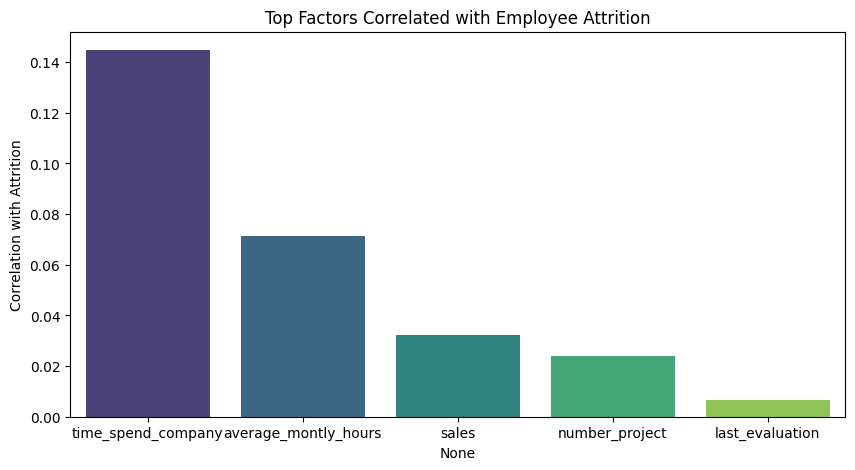

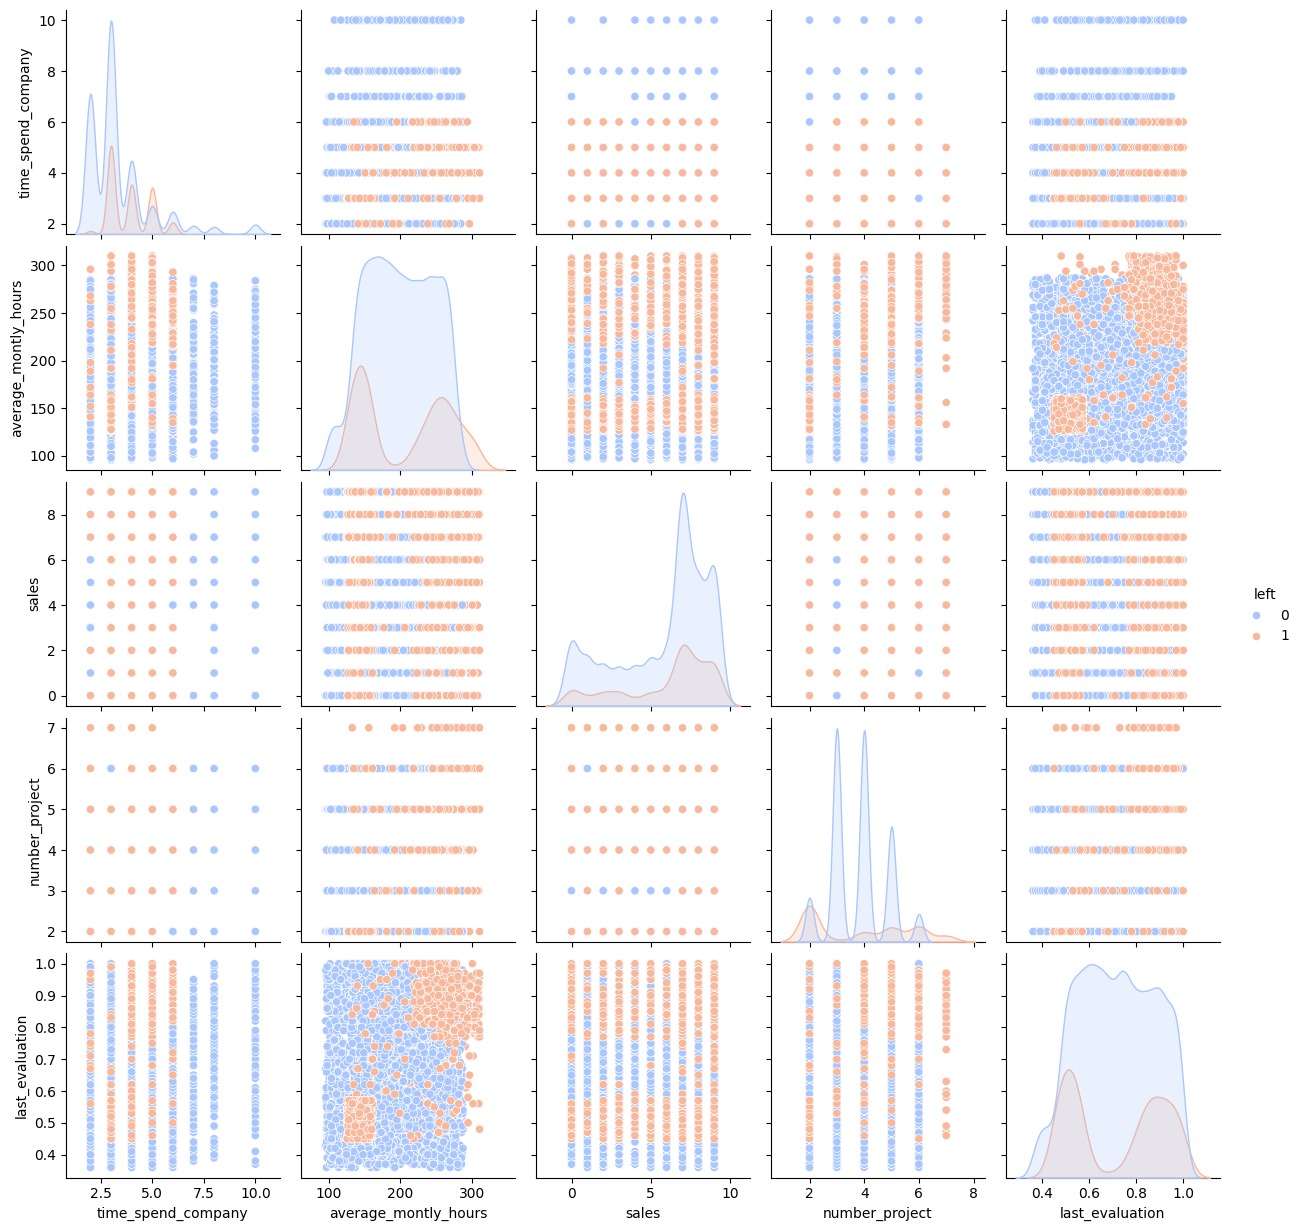


Attrition Rate by Number of Projects:
 number_project
2    0.656198
3    0.017756
4    0.093700
5    0.221659
6    0.557922
7    1.000000
Name: left, dtype: float64


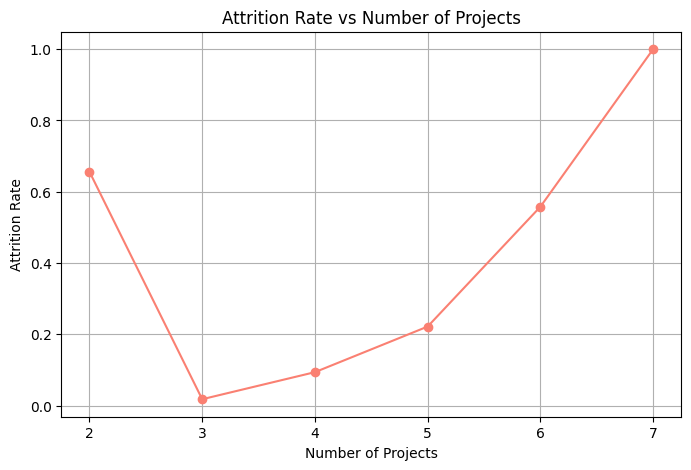


Insights:
- Higher attrition correlates with lower satisfaction, high workload, and salary levels.
- Employees with more projects may have a higher risk of leaving if workload is excessive.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# -------------------------------
# Step 1: Upload CSV
# -------------------------------
uploaded = files.upload()
filename = list(uploaded.keys())[0]
hr = pd.read_csv(filename)

# -------------------------------
# Step 2: Clean column names
# -------------------------------
hr.columns = hr.columns.str.strip()
hr.columns = [col.replace(' ', '_') for col in hr.columns]
print("Columns available:\n", hr.columns)

# -------------------------------
# Step 3: Convert categorical columns to numeric
# -------------------------------
categorical_cols = ['sales', 'salary']  # convert to numeric codes
for col in categorical_cols:
    hr[col] = hr[col].astype('category').cat.codes

# Attrition column
attrition_col = 'left'

# -------------------------------
# Step 4: Part a) Factors Correlated with Attrition
# -------------------------------
# Compute correlation matrix
corr = hr.corr()
attrition_corr = corr[attrition_col].sort_values(ascending=False)
print("\nCorrelation with Attrition:\n", attrition_corr)

# Visualize top 5 factors correlated with attrition
top_factors = attrition_corr.drop(attrition_col).head(5).index

plt.figure(figsize=(10,5))
sns.barplot(x=top_factors, y=attrition_corr[top_factors].values, palette='viridis')
plt.title("Top Factors Correlated with Employee Attrition")
plt.ylabel("Correlation with Attrition")
plt.show()

# Optional: pairplot for top factors
sns.pairplot(hr, vars=top_factors, hue=attrition_col, palette='coolwarm')
plt.show()

# -------------------------------
# Step 5: Part b) Effect of Number of Projects on Attrition
# -------------------------------
projects_col = 'number_project'

# Average attrition rate per number of projects
projects_attrition = hr.groupby(projects_col)[attrition_col].mean()
print("\nAttrition Rate by Number of Projects:\n", projects_attrition)

# Visualization
plt.figure(figsize=(8,5))
projects_attrition.plot(marker='o', linestyle='-', color='salmon')
plt.title("Attrition Rate vs Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate")
plt.grid(True)
plt.show()

print("\nInsights:")
print("- Higher attrition correlates with lower satisfaction, high workload, and salary levels.")
print("- Employees with more projects may have a higher risk of leaving if workload is excessive.")
